<a href="https://colab.research.google.com/github/usmanqadeer1/GarbageDetectionSegmentation/blob/main/GarbageDataSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Drive and Access Dataset

In [1]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# prompt: Mount google drive

from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# prompt: access files in a folder

import os

# Get the list of files in the root directory of the mounted Google Drive
files = os.listdir('/content/drive/MyDrive/Colab Notebooks/GarbageDetectionSegmentation/DataSet/')

# Print the list of files
print(files)


['360_480', '2_predict.png', '1_predict.png', '0_predict.png', 'output_sample', 'abc_2.mp4', 'sample_output_2.mp4', 'samp_output_2.avi', 'JPEGImages', 'outputa', 'output', 'trin_X with different color code', 'output_inGate_lums_2', 'output_Lahore_alfalah_Town', 'IMG_6551.MOV', 'IMG_6550.MOV', 'IMG_6555.MOV', 'unseen data', 'LUMS_InGate_output_2.avi', 'comset_output_2.avi', 'new_851', 'Data Shaikupura', 'Lahore_alfalah_Town', 'ingate_lums', 'test_data_npy', 'trin_Y with different collor code']


# Get Dataset including input and images

In [4]:
input_images_path = '/content/drive/MyDrive/Colab Notebooks/GarbageDetectionSegmentation/DataSet/trin_X with different color code'
input_labels_path = '/content/drive/MyDrive/Colab Notebooks/GarbageDetectionSegmentation/DataSet/trin_Y with different collor code'


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(os.listdir(input_images_path), os.listdir(input_images_path), test_size=0.2, random_state=42)

In [6]:
len(X_train)//8, len(X_test)//8

(27, 6)

# Visualize Data

In [10]:
input_file_name = input_images_path + '/' + X_train[11]
label_file_name =input_labels_path + '/' + X_train[11][:-4] + '_color_mask.png'
# input_file_name = '/content/drive/MyDrive/Colab Notebooks/GarbageDetectionSegmentation/DataSet/trin_X with different color code/frame272.jpg'
# label_file_name = '/content/drive/MyDrive/Colab Notebooks/GarbageDetectionSegmentation/DataSet/trin_Y with different collor code/frame272_color_mask'
input_a = np.array(cv2.imread(input_file_name))
label_a = np.array(cv2.imread(label_file_name))
# np.unique(label_a[0,:,:]), np.unique(label_a[:,0,:]), np.unique(label_a[:,:,0])
input_file_name, label_file_name

('/content/drive/MyDrive/Colab Notebooks/GarbageDetectionSegmentation/DataSet/trin_X with different color code/frame256.jpg',
 '/content/drive/MyDrive/Colab Notebooks/GarbageDetectionSegmentation/DataSet/trin_Y with different collor code/frame256_color_mask.png')

In [11]:
input_a.shape, label_a.shape

((1080, 1920, 3), (1080, 1920, 3))

## Get unique colors in label

In [12]:
# prompt: find all unique rgb colors in label_a and find top 3 with most pixels

import numpy as np
# Find all unique RGB colors in label_a
unique_colors, counts = np.unique(label_a.reshape(-1, 3), axis=0, return_counts=True)

# Sort colors by pixel count in descending order
sorted_indices = np.argsort(counts)[::-1]
top_3_colors = unique_colors[sorted_indices[:3]]
top_3_counts = counts[sorted_indices[:3]]

print("Top 3 colors with most pixels:")
for color, count in zip(top_3_colors, top_3_counts):
  print(f"Color: {color}, Count: {count}")


Top 3 colors with most pixels:
Color: [  0   0 255], Count: 1422378
Color: [152 251 152], Count: 634443
Color: [  0 220 220], Count: 10783


In [13]:
color1 = [0, 0, 255]
color2 = [152, 251, 152]
color3 = [0, 220, 220]
colors = [color1, color2, color3]

In [14]:
# prompt: decode label_a for color1, color2, color3 as class1, class2, class3 found above. Write efficient code without using for loops

import numpy as np
# Create boolean masks for each color
mask1 = np.all(label_a == color1, axis=-1)
mask2 = np.all(label_a == color2, axis=-1)
mask3 = np.all(label_a == color3, axis=-1)

# Create an empty array to store the decoded labels
decoded_labels = np.zeros(label_a.shape[:2], dtype=np.uint8)

# Assign class labels based on the masks
decoded_labels[mask1] = 0
decoded_labels[mask2] = 1
decoded_labels[mask3] = 2
np.unique(decoded_labels)

array([0, 1, 2], dtype=uint8)

In [15]:
import numpy as np
def decode_labels(label_image, colors):
  """Decodes a label image into class labels.

  Args:
    label_image: A numpy array representing the label image.
    colors: A list of RGB colors corresponding to each class.

  Returns:
    A numpy array of the same shape as label_image, containing class labels.
  """

  decoded_labels = np.zeros(label_image.shape[:2], dtype=np.uint8)
  for i, color in enumerate(colors):
    mask = np.all(label_image == color, axis=-1)
    decoded_labels[mask] = i
  return decoded_labels

decoded_label1 = decode_labels(label_a, colors)
np.unique(decoded_label1)

array([0, 1, 2], dtype=uint8)

In [16]:
# prompt: find the repetition of 0, 1 and 2 in decoded_labels. How many time each has been repeated

import numpy as np
unique_elements, counts = np.unique(decoded_labels, return_counts=True)

for element, count in zip(unique_elements, counts):
  print(f"Element {element} is repeated {count} times.")


Element 0 is repeated 1428374 times.
Element 1 is repeated 634443 times.
Element 2 is repeated 10783 times.


# Generator for dataset

In [17]:
# def data_generator(path_input_,path_label_,list_dir,batch_size):

#         path_size=len(list_dir)
#         array_size_index = np.arange(0,path_size,batch_size)

#         if  path_size % batch_size != 0:
#                 array_size_index = array_size_index[:-1]
#         while True:
#                 for xi in array_size_index:
#                         batch_start = xi
#                         batch_end = xi + batch_size
#                         batch_images  = []
#                         i=0
#                         batch_labels = []
#                         index=batch_start
#                         while (index < batch_end):
#                                 input_file_name = path_input_ + '/' + list_dir[index]
#                                 label_file_name = path_label_ + '/' + list_dir[index][:-4] + '_color_mask.png'
#                                 input_a = cv2.imread(input_file_name)
#                                 input_a = np.array(cv2.resize(input_a,(512, 512)))
#                                 input_a = input_a/255.0

#                                 label_a = cv2.imread(label_file_name)
#                                 label_a = np.array(cv2.resize(label_a,(512, 512)))
#                                 label_a = label_a.astype(np.float32)
#                                 label_v = decode_labels(label_a, colors)
#                                 label = tf.keras.utils.to_categorical(label_v,3)

#                                 batch_images.append(input_a)

#                                 batch_labels.append(label)
#                                 index=index+1

#                         batch_images=np.array(batch_images)
#                         batch_labels=np.array(batch_labels)
#                         yield(batch_images,batch_labels)

In [20]:
import numpy as np
import tensorflow as tf

def data_generator(path_input_, path_label_, list_dir, batch_size):
    path_size = len(list_dir)
    array_size_index = np.arange(0, path_size, batch_size)

    if path_size % batch_size != 0:
        array_size_index = array_size_index[:-1]

    while True:
        for xi in array_size_index:
            batch_start = xi
            batch_end = xi + batch_size
            batch_images = []
            batch_labels = []
            index = batch_start

            while index < batch_end:
                input_file_name = f"{path_input_}/{list_dir[index]}"
                label_file_name = f"{path_label_}/{list_dir[index][:-4]}_color_mask.png"

                input_a = cv2.imread(input_file_name)
                if input_a is None:
                    print(f"Failed to read input image: {input_file_name}")
                    index += 1
                    continue

                try:
                    input_a = cv2.resize(input_a, (512, 512))
                except cv2.error as e:
                    print(f"OpenCV error resizing input image: {input_file_name}, {e}")
                    index += 1
                    continue

                input_a = input_a / 255.0

                label_a = cv2.imread(label_file_name)
                if label_a is None:
                    print(f"Failed to read label image: {label_file_name}")
                    index += 1
                    continue

                try:
                    label_a = cv2.resize(label_a, (512, 512))
                except cv2.error as e:
                    print(f"OpenCV error resizing label image: {label_file_name}, {e}")
                    index += 1
                    continue

                label_a = label_a.astype(np.float32)
                label_v = decode_labels(label_a, colors)  # Assuming decode_labels and colors are defined
                label = tf.keras.utils.to_categorical(label_v, 3)

                batch_images.append(input_a)
                batch_labels.append(label)
                index += 1

            if batch_images and batch_labels:
                batch_images = np.array(batch_images)
                batch_labels = np.array(batch_labels)
                yield batch_images, batch_labels
            else:
                print(f"Empty batch encountered, skipping batch starting at index {batch_start}")


In [60]:
batch_size = 8
train_gen = data_generator(input_images_path, input_labels_path, X_train,batch_size)
test_gen = data_generator(input_images_path, input_labels_path, X_test,batch_size)

In [ ]:
# prompt: iterate through train_gen and get shape of each batch

num_batches_to_display = 27  # Number of batches to display

for i in range(num_batches_to_display):
  batch_images, batch_labels = next(train_gen)
  print(f"Batch {i+1}:")
  print("  Images shape:", batch_images.shape)
  print("  Labels shape:", batch_labels.shape)


In [ ]:
num_batches_to_display = 6  # Number of batches to display

for i in range(num_batches_to_display):
  batch_images, batch_labels = next(test_gen)
  print(f"Batch {i+1}:")
  print("  Images shape:", batch_images.shape)
  print("  Labels shape:", batch_labels.shape)

In [22]:
train_images, train_labels = next(test_gen)
train_labels.shape, train_images.shape

((8, 512, 512, 3), (8, 512, 512, 3))

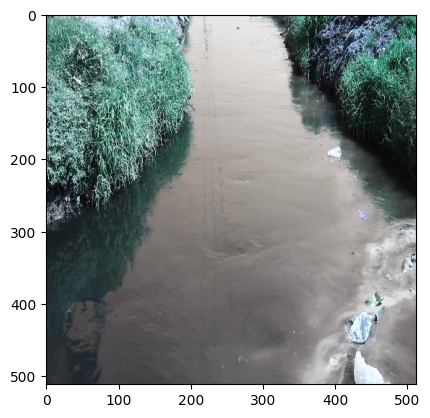

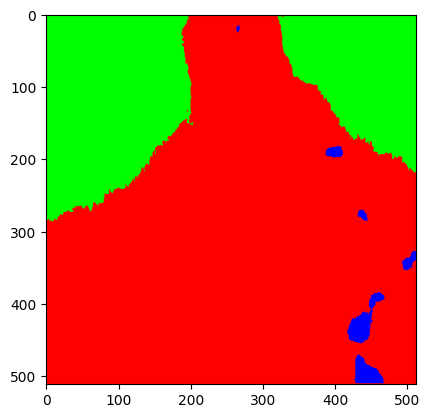

In [23]:
# prompt: display 1 sample from train_generator

import matplotlib.pyplot as plt
train_images, train_labels = next(train_gen)

# Display the first image in the batch
plt.imshow(train_images[0])
plt.show()

# # Display the corresponding label
plt.imshow(train_labels[0])
plt.show()


# Model

In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, Conv2DTranspose

def unet(input_shape):
    inputs = Input(input_shape)

    # Encoder (contracting path)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bottleneck
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)

    # Decoder (expansive path)
    up5 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv4)
    up5 = concatenate([up5, conv3], axis=3)
    conv5 = Conv2D(256, 3, activation='relu', padding='same')(up5)
    conv5 = Conv2D(256, 3, activation='relu', padding='same')(conv5)

    up6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv5)
    up6 = concatenate([up6, conv2], axis=3)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv6)
    up7 = concatenate([up7, conv1], axis=3)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(conv7)

    # Output layer
    output = Conv2D(3, 1, activation='softmax')(conv7)  # adjust activation based on your task

    # Create model
    model = Model(inputs=inputs, outputs=output)

    return model

# Example usage
input_shape = (512, 512, 3)
model = unet(input_shape)
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv2d_15 (Conv2D)          (None, 512, 512, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 conv2d_16 (Conv2D)          (None, 512, 512, 64)         36928     ['conv2d_15[0][0]']           
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 256, 256, 64)         0         ['conv2d_16[0][0]']           
 g2D)                                                                                       

In [27]:
# prompt: train unet model on dataset for semantic segmentation

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_gen, epochs = 10, validation_data = test_gen, steps_per_epoch = len(X_train)//batch_size, validation_steps = len(X_test)//batch_size)

Epoch 1/10
27/27 [==============================] - 93s 3s/step - loss: 0.5287 - accuracy: 0.8151 - val_loss: 0.1951 - val_accuracy: 0.9505
Epoch 2/10
27/27 [==============================] - 43s 2s/step - loss: 0.1533 - accuracy: 0.9585 - val_loss: 0.0991 - val_accuracy: 0.9699
Epoch 3/10
27/27 [==============================] - 43s 2s/step - loss: 0.0865 - accuracy: 0.9733 - val_loss: 0.0628 - val_accuracy: 0.9789
Epoch 4/10
27/27 [==============================] - 47s 2s/step - loss: 0.0722 - accuracy: 0.9772 - val_loss: 0.0515 - val_accuracy: 0.9818
Epoch 5/10
27/27 [==============================] - 43s 2s/step - loss: 0.0673 - accuracy: 0.9783 - val_loss: 0.0486 - val_accuracy: 0.9828
Epoch 6/10
27/27 [==============================] - 43s 2s/step - loss: 0.0642 - accuracy: 0.9796 - val_loss: 0.0479 - val_accuracy: 0.9828
Epoch 7/10
27/27 [==============================] - 43s 2s/step - loss: 0.0561 - accuracy: 0.9814 - val_loss: 0.0454 - val_accuracy: 0.9842
Epoch 8/10
27/27 [==

In [58]:
# prompt: save model to /content/drive/MyDrive/Colab Notebooks/GarbageDetectionSegmentation

model.save('/content/drive/MyDrive/Colab Notebooks/GarbageDetectionSegmentation/my_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# evaluation

In [63]:
# prompt: load model from /content/drive/MyDrive/Colab Notebooks/GarbageDetectionSegmentation

from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/Colab Notebooks/GarbageDetectionSegmentation/my_model.h5'
loaded_model = load_model(model_path)


In [64]:
# prompt: compute accuracy for each class

import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming 'test_gen' is your test data generator
num_test_samples = len(X_test)
y_true = []
y_pred = []

for _ in range(num_test_samples // batch_size):
    test_images, test_labels = next(test_gen)
    predictions = loaded_model.predict(test_images)

    # Convert one-hot encoded predictions and labels to class indices
    predicted_classes = np.argmax(predictions, axis=-1)
    true_classes = np.argmax(test_labels, axis=-1)

    y_true.extend(true_classes.flatten())
    y_pred.extend(predicted_classes.flatten())

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate per-class accuracy
class_accuracy = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

# Print per-class accuracy
for i, accuracy in enumerate(class_accuracy):
    print(f"Accuracy for class {i}: {accuracy}")


1/1 [==============================] - 0s 31ms/step
Accuracy for class 0: 0.9847985865073109
Accuracy for class 1: 0.9877183408869874
Accuracy for class 2: 0.7061305770233749


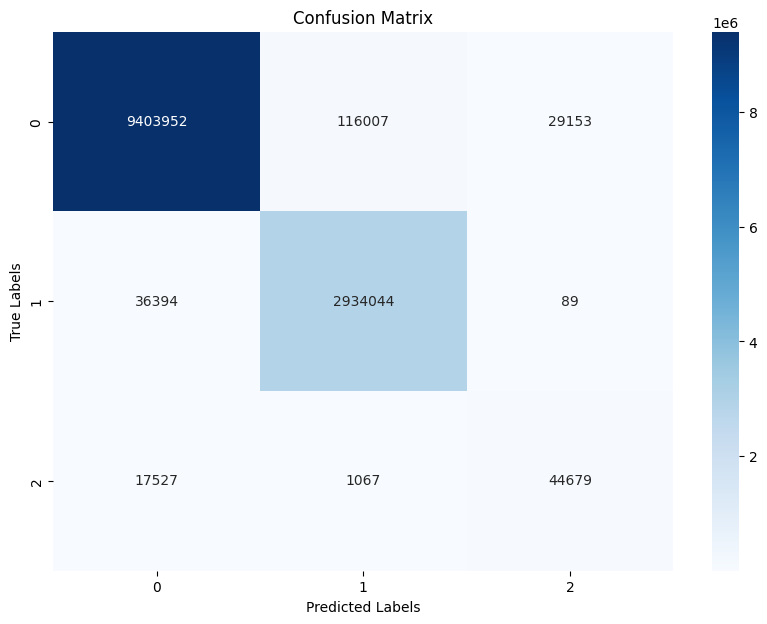

In [65]:
# prompt: print conf_matrix using seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [66]:
# prompt: compute recall, precision and f1_score from conf_matrix

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred, average='macro')  # Use 'macro' for multi-class
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Precision: 0.8534478318719234
Recall: 0.8928825014725578
F1-score: 0.8717836413051155


In [61]:
# prompt: calculate iou for X_test

import numpy as np
def calculate_iou(y_true, y_pred):
  """Calculates Intersection over Union (IoU) for semantic segmentation.

  Args:
    y_true: A numpy array of true labels, shape (num_samples, height, width, num_classes).
    y_pred: A numpy array of predicted labels, shape (num_samples, height, width, num_classes).

  Returns:
    A numpy array of IoU scores for each class, shape (num_classes,).
  """

  num_classes = y_true.shape[-1]
  iou_scores = []
  for class_idx in range(num_classes):
    y_true_class = y_true[:,:,:,class_idx]
    y_pred_class = y_pred[:,:,:,class_idx]

    intersection = np.logical_and(y_true_class, y_pred_class).sum()
    union = np.logical_or(y_true_class, y_pred_class).sum()

    if union == 0:
      iou_score = 0.0  # Handle cases where union is zero to avoid division by zero
    else:
      iou_score = intersection / union
    iou_scores.append(iou_score)

  return np.array(iou_scores)

# Assuming 'test_gen' is your generator for test data
iou_scores = []
for _ in range(len(X_test)//batch_size):  # Iterate over all batches in the test set
  test_images, test_labels = next(test_gen)
  y_pred_probs = model.predict(test_images)
  y_pred = np.argmax(y_pred_probs, axis=-1)
  y_true = np.argmax(test_labels, axis=-1)

  # Reshape y_pred to match y_true if necessary (assuming single-channel labels)
  if y_pred.ndim == 3:
    y_pred = np.expand_dims(y_pred, axis=-1)

  # One-hot encode y_true and y_pred for IoU calculation
  y_true_onehot = tf.keras.utils.to_categorical(y_true, num_classes=3)
  y_pred_onehot = tf.keras.utils.to_categorical(y_pred, num_classes=3)

  batch_iou_scores = calculate_iou(y_true_onehot, y_pred_onehot)
  iou_scores.append(batch_iou_scores)

# Calculate mean IoU for each class across all batches
mean_iou_scores = np.mean(iou_scores, axis=0)
print("Mean IoU scores for each class:", mean_iou_scores)


1/1 [==============================] - 0s 32ms/step
Mean IoU scores for each class: [0.97926233 0.95021336 0.49040733]


#visualize output

In [38]:
test_images, test_labels = next(test_gen)
predictions = model.predict(test_images)

1/1 [==============================] - 0s 59ms/step


In [39]:

import numpy as np
predictions_argmax = np.argmax(predictions[0], axis=-1)


In [40]:
# prompt: write function show predictions_argmax[0] in image such that each label from 0,1,2 has different color

import matplotlib.pyplot as plt
import numpy as np
def visualize_predictions(prediction_argmax):
  """Visualizes the predicted segmentation mask.

  Args:
    prediction_argmax: A NumPy array of shape (height, width) containing the predicted class labels.
  """

  # Define colors for each class
  color_map = {
      0: [255, 0, 0],  # Red for class 0
      1: [0, 255, 0],  # Green for class 1
      2: [0, 0, 255]   # Blue for class 2
  }

  # Create a colorized image
  colorized_image = np.zeros((prediction_argmax.shape[0], prediction_argmax.shape[1], 3), dtype=np.uint8)
  for class_label in range(3):
    colorized_image[prediction_argmax == class_label] = color_map[class_label]

  # Display the colorized image
  plt.imshow(colorized_image)
  plt.title("Predicted Segmentation Mask")
  plt.show()




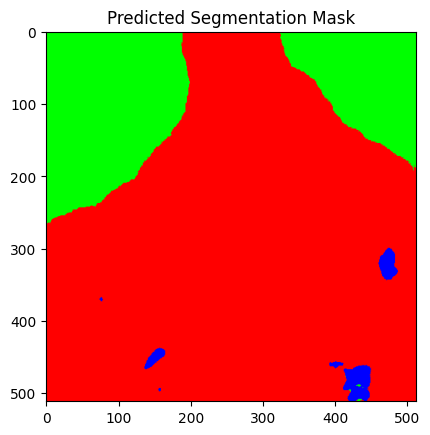

In [42]:
# Visualize the predictions for the first image in the batch
visualize_predictions(predictions_argmax)

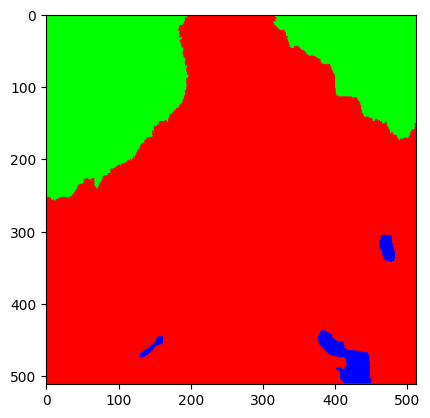

In [55]:
plt.imshow(test_labels[0])